In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df_test.csv")
print(df.head())
print(df.columns)

df["date"] = pd.to_datetime(df["date"])
df["date"] = df["date"].apply(lambda x: x.toordinal())
df["date"] /= df["date"].max()
df["living_in_m2"] /= df["living_in_m2"].max()
df["price"] /= df["price"].max()

df = df.astype("double")
df["amenity_score"] = df["bedrooms"] + df["real_bathrooms"] + df["has_basement"] + df["has_lavatory"] + df["nice_view"] + df["renovated"]

print(df.head())

n = 5380

df_train = df.iloc[:n]
df_test = df.iloc[n:]

         date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2014-09-26  305000.0         2      1         False      76.18046   
1  2014-05-14  498000.0         3      2          True     210.88981   
2  2015-03-23  590000.0         2      4         False     262.91549   
3  2014-07-15  775000.0         3      3         False     159.79316   
4  2015-04-14  350000.0         2      1         False      92.90300   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False               True               1         False   
1      False      False              False               2          True   
2      False      False              False               2          True   
3      False      False              False               1          True   
4      False      False              False               1          True   

   single_floor  month  quartile_zone  
0          True      9              2  
1          True      5        

In [3]:
print(df.corr())

                       date     price  bedrooms     grade  has_basement  \
date               1.000000 -0.002861 -0.028776 -0.054695      0.002111   
price             -0.002861  1.000000  0.289470  0.620402      0.166142   
bedrooms          -0.028776  0.289470  1.000000  0.354199      0.096495   
grade             -0.054695  0.620402  0.354199  1.000000     -0.007222   
has_basement       0.002111  0.166142  0.096495 -0.007222      1.000000   
living_in_m2      -0.050074  0.610033  0.610204  0.699583      0.162362   
renovated         -0.015526  0.086882  0.015578 -0.005956      0.023397   
nice_view          0.019486  0.235558  0.018392  0.122704      0.149426   
perfect_condition -0.048403  0.061467  0.047726 -0.112104      0.103476   
real_bathrooms    -0.034362  0.393790  0.440109  0.531005      0.079478   
has_lavatory      -0.024179  0.238521  0.298094  0.398265      0.104299   
single_floor       0.013668 -0.288927 -0.268878 -0.440901      0.276929   
month             -0.3404

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     3187.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:32:28   Log-Likelihood:                 2828.4
No. Observations:                5380   AIC:                            -5653.
Df Residuals:                    5378   BIC:                            -5640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1178      0.006     21.270   

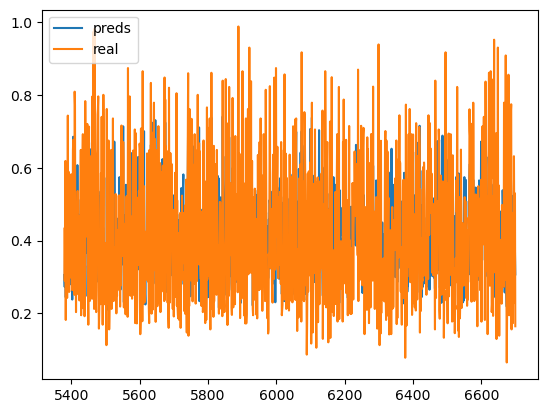

In [4]:
model_lr = smf.ols("price ~ living_in_m2", df_train)
result_lr = model_lr.fit()
print(result_lr.summary())

preds = result_lr.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1180.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:32:28   Log-Likelihood:                 5208.9
No. Observations:                5380   AIC:                        -1.039e+04
Df Residuals:                    5366   BIC:                        -1.030e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -49.2264      8.70

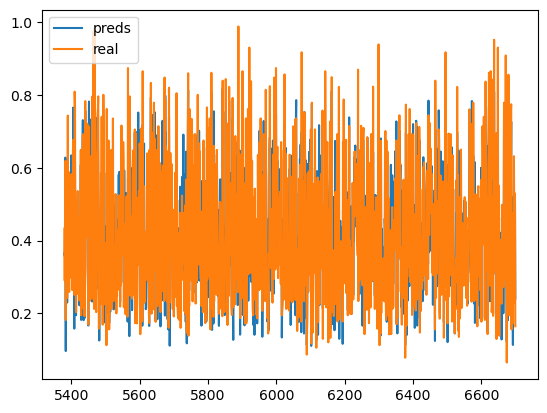

In [5]:
model_mv = smf.ols("price ~ date + bedrooms + grade + has_basement + living_in_m2 + renovated + nice_view + perfect_condition + real_bathrooms + has_lavatory + single_floor + month + quartile_zone", df_train)
result_mv = model_mv.fit()
print(result_mv.summary())

preds = result_mv.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1682.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:32:28   Log-Likelihood:                 4950.5
No. Observations:                5380   AIC:                            -9883.
Df Residuals:                    5371   BIC:                            -9824.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -54.5674      9.11

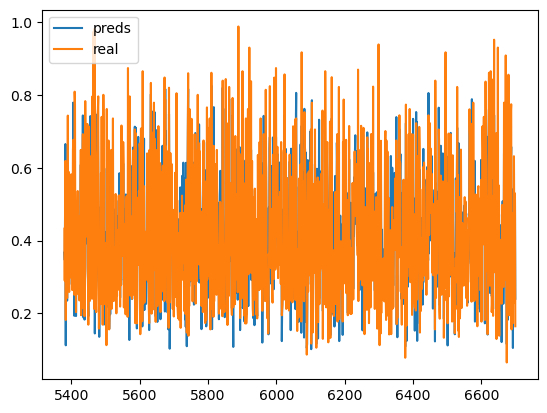

In [6]:
model_mv2 = smf.ols("price ~ amenity_score + date + grade + living_in_m2 + perfect_condition + single_floor + month + quartile_zone", df_train)
result_mv2 = model_mv2.fit()
print(result_mv2.summary())

preds = result_mv2.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2359.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:32:29   Log-Likelihood:                 5047.9
No. Observations:                5380   AIC:                        -1.008e+04
Df Residuals:                    5373   BIC:                        -1.004e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0630      0.005    -11.

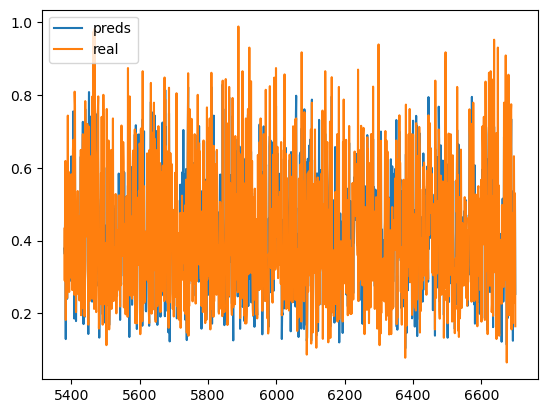

In [7]:
model_mv2 = smf.ols("price ~ bedrooms + grade + living_in_m2 + quartile_zone + nice_view + real_bathrooms", df_train)
result_mv2 = model_mv2.fit()
print(result_mv2.summary())

preds = result_mv2.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(128, "relu", input_shape = [13]))
model.add(Dense(256, "relu"))
model.add(Dense(512, "relu"))
model.add(Dense(256, "relu"))
model.add(Dense(128, "relu"))
model.add(Dense(1))

model.compile(optimizer = "ADAM", loss = "MSE")

features = ["date", "bedrooms", "grade", "has_basement", "living_in_m2", "renovated", "nice_view", "perfect_condition", "real_bathrooms", "has_lavatory", "single_floor", "month", "quartile_zone"]

early_stopping = EarlyStopping(monitor = "val_loss", patience = 20, restore_best_weights = True)
result = model.fit(df_train[features], df_train["price"], epochs = 500, validation_data = [df_test[features], df_test["price"]], callbacks = [early_stopping])

Epoch 1/500
169/169 [==============================] - 3s 8ms/step - loss: 0.0164 - val_loss: 0.0167
Epoch 2/500
169/169 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0079
Epoch 3/500
169/169 [==============================] - 1s 8ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 4/500
169/169 [==============================] - 1s 5ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 5/500
169/169 [==============================] - 1s 5ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 6/500
169/169 [==============================] - 1s 5ms/step - loss: 0.0090 - val_loss: 0.0084
Epoch 7/500
169/169 [==============================] - 1s 6ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 8/500
169/169 [==============================] - 1s 5ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 9/500
169/169 [==============================] - 1s 5ms/step - loss: 0.0084 - val_loss: 0.0076
Epoch 10/500
169/169 [==============================] - 1s 7ms/step - loss: 0.0086 - val_lo

42/42 [==============================] - 0s 3ms/step


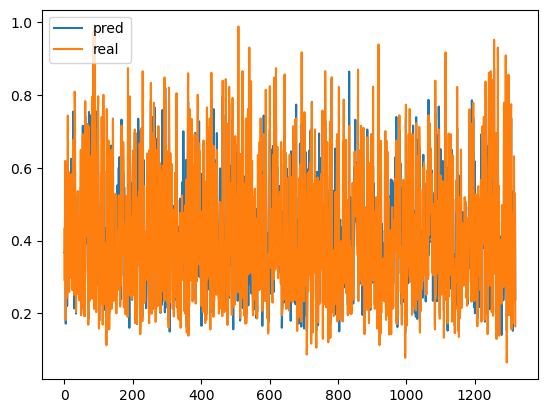

In [51]:
y_pred = model.predict(df_test[features]).flatten()

plt.plot(y_pred, label = "pred")
plt.plot(list(df_test["price"]), label = "real")
plt.legend()
plt.show()

In [52]:
mse_lr = np.mean((np.array(result_lr.predict(df_test)) - df_test["price"].values) ** 2)
mse_mv = np.mean((np.array(result_mv.predict(df_test)) - df_test["price"].values) ** 2)
mse_mv2 = np.mean((np.array(result_mv2.predict(df_test)) - df_test["price"].values) ** 2)
mse = np.mean((model.predict(df_test[features]).flatten() - df_test["price"].values) ** 2)

print("mse_lr:", mse_lr)
print("mse_mv:", mse_mv)
print("mse_mv2:", mse_mv2)
print("mse:", mse)

42/42 [==============================] - 0s 2ms/step
mse_lr: 0.020002346440276184
mse_mv: 0.007680750324775481
mse_mv2: 0.00809305872611052
mse: 0.00757470577216172
